In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


In [5]:
  DATASET_PATH ="/content/drive/My Drive//NER/ner_datasetreference.csv"

In [128]:
df = pd.read_csv(DATASET_PATH,encoding= 'unicode_escape')
df = df.fillna(method='ffill')


In [130]:
df.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


Check NA **values**

In [131]:
df.isna().value_counts()

Sentence #  Word   POS    Tag  
False       False  False  False    1048575
dtype: int64

In [132]:
data = df
data['Sentence #'].unique()


array(['Sentence: 1', 'Sentence: 2', 'Sentence: 3', ...,
       'Sentence: 47957', 'Sentence: 47958', 'Sentence: 47959'],
      dtype=object)

In [133]:
data.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

Check unique words and tags

In [118]:
print("There are : {} unique words".format(df['Word'].nunique()))
print("There are : {} unique tags".format(df['Tag'].nunique()))

There are : 35178 unique words
There are : 17 unique tags


In [37]:
df['Word'].values

array(['Thousands', 'of', 'demonstrators', ..., 'to', 'the', 'attack'],
      dtype=object)

Create dataset for unique words, tags

In [119]:
words = list(set(df['Word'].values))
words.append('ENDPAD')
tags = list(set(set(df['Tag'].values)))

In [120]:
np.shape(words)

(35179,)

In [121]:
np.shape(tags)

(17,)

In [122]:
num_words = len(words)
num_tags = len(tags)
print(num_tags)
print(num_words)

17
35179


In [135]:
gk = df.groupby('Sentence #')

In [138]:
gk.first()
gk.get_group('Sentence: 1')

,Word,POS,Tag
0,Thousands,NNS,O
1,of,IN,O
2,demonstrators,NNS,O
3,have,VBP,O
4,marched,VBN,O
5,through,IN,O
6,London,NNP,B-geo
7,to,TO,O
8,protest,VB,O
9,the,DT,O


In [123]:
class Sentence_getter(object):
    def __init__(self, data):
        self.data = data
        agg_fun = lambda s: [(w, p, t) for w,p,t in zip(s["Word"].values.tolist(),
                                                       s["POS"].values.tolist(),
                                                       s['Tag'].values.tolist())]
        
        self.grouped = self.data.groupby('Sentence #').apply(agg_fun)
        self.sentences = [i for i in self.grouped]

In [146]:
getter = Sentence_getter(df)

In [147]:
sentences = getter.sentences

In [148]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [66]:
#@title Creating vocabulary


In [149]:
word2idx = {w: i+1 for i,w in enumerate(words)}
tag2idx = {t: j for j,t in enumerate(tags)}

In [150]:
sentences = getter.sentences

[]

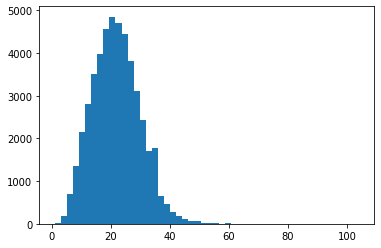

In [151]:
plt.hist([len(s) for s in sentences], bins = 50)
plt.plot()

In [152]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

#save index values of words and tags into X,y 

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = max_len, sequences=X, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = max_len, sequences=y, padding='post', value=tag2idx["O"])


Converting output labes to categorical ( ONE_HOT )

In [174]:
y = [to_categorical(i, num_classes = num_tags) for i in y]

In [177]:
y[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

Split data

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_tarin,y_test = train_test_split(X,y,test_size = 0.1, random_state=1)

Building and compiling a BiLSTM


In [188]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense,Embedding
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [190]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=max_len,input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100,return_sequences=True,recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags,activation='softmax'))(model)
model = Model(input_word,out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 50, 50)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_3 (Bidirectio  (None, 50, 200)          120800    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 50, 17)           3417      
 tributed)                                                       
                                                             

In [191]:
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [194]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

In [196]:
type(y_tarin)

list

In [198]:
earlystopp = EarlyStopping(monitor='val_accuracy', patience=1,verbose=0,mode=max,restore_best_weights=False)


In [201]:
callbacks = [PlotLossesKeras(),earlystopp]

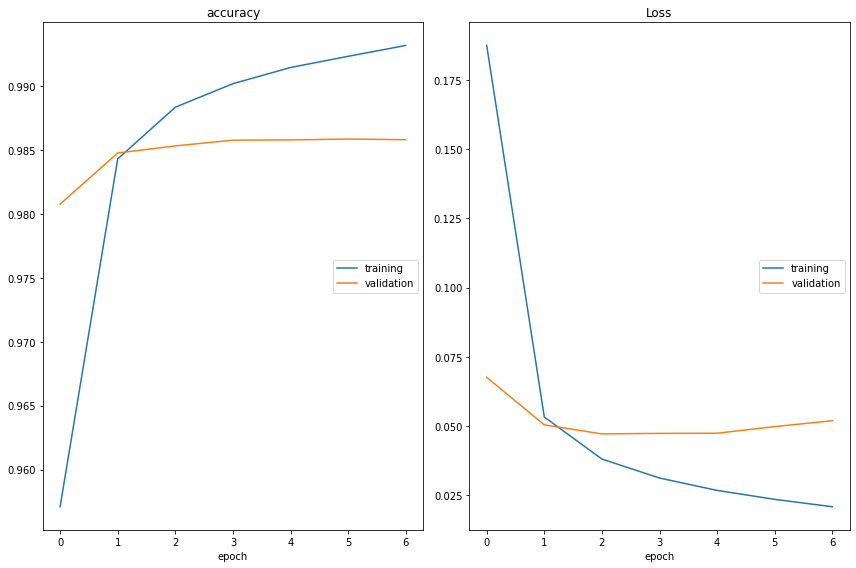

accuracy
	training         	 (min:    0.957, max:    0.993, cur:    0.993)
	validation       	 (min:    0.981, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.021, max:    0.187, cur:    0.021)
	validation       	 (min:    0.047, max:    0.068, cur:    0.052)
1080/1080 [==============================] - 205s 190ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0520 - val_accuracy: 0.9858


In [202]:
history = model.fit(x_train,np.array(y_tarin),validation_split=0.2,callbacks=callbacks,batch_size=32,epochs=10,verbose=1)

In [204]:
model.evaluate(x_test,np.array(y_test))

150/150 [==============================] - 4s 26ms/step - loss: 0.0542 - accuracy: 0.9855


[0.05416154861450195, 0.985471248626709]

In [212]:
p = model.predict(np.array(['google','jack']))

ValueError: ignored

In [214]:
x_test[0]

array([25699, 14617, 31256, 33780, 29329, 34522, 31256, 15285,  8371,
       34984, 24149, 21031,  8371, 29254,  2458, 15303, 21005, 12198,
       31256, 21005, 14346, 23049,  6733, 16605, 34415, 19679,  8371,
       30167, 34711, 22621, 15079, 23049, 21005,  7408, 13813, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178], dtype=int32)